# Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2,f_classif
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings('ignore')

# Loading Data

In [2]:
data = pd.read_csv('weather_classification_data.csv')
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [4]:
# Fetch all the numeric columns
num_col = (data.dtypes != 'object')
num_cols = list(num_col[num_col].index)
print(num_cols)

# Fetch all the categorical columns
cat_col = (data.dtypes == 'object')
cat_cols = list(cat_col[cat_col].index)
print(cat_cols)


['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
['Cloud Cover', 'Season', 'Location', 'Weather Type']


In [5]:
for col in cat_cols:
    print(data[col].value_counts(),'\n')

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64 

Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64 

Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64 

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64 



# EDA

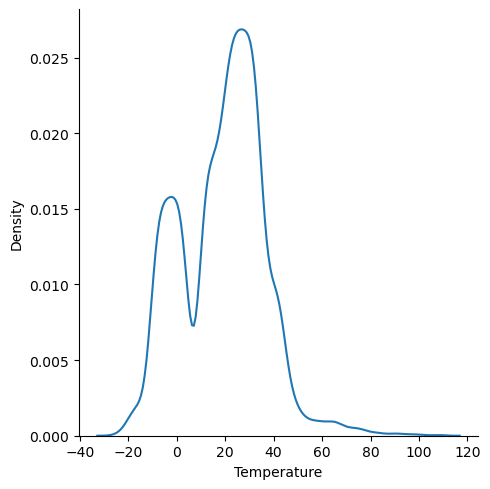

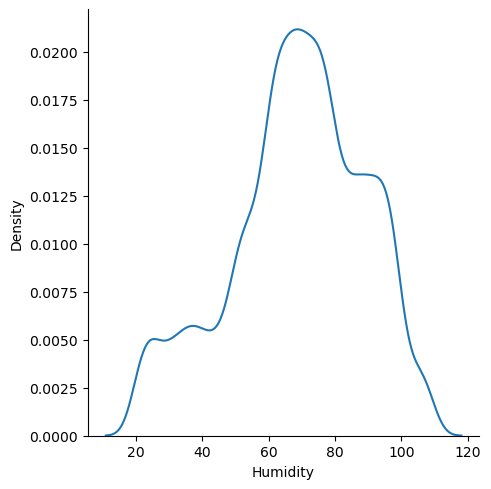

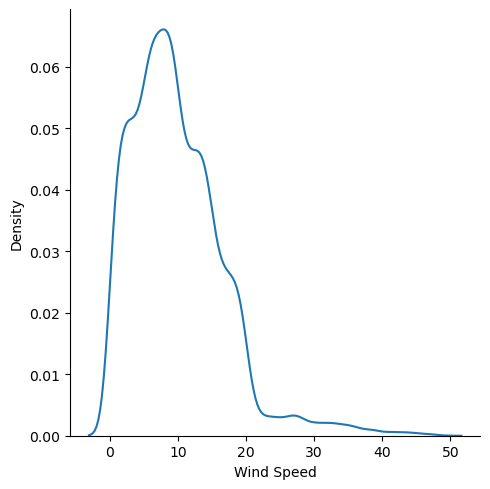

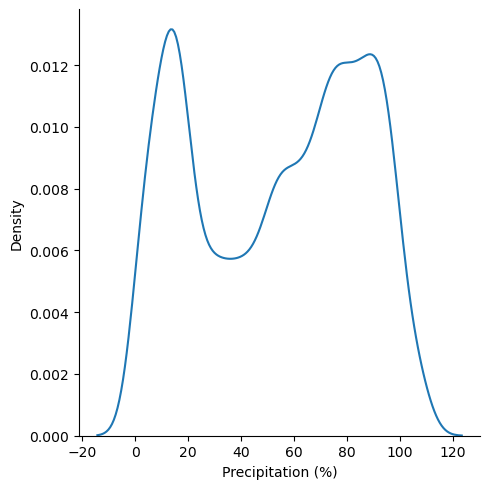

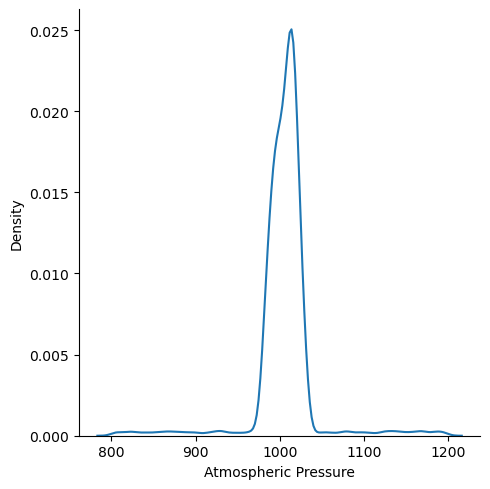

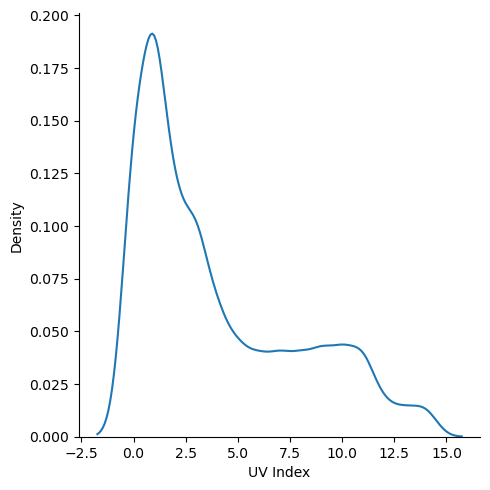

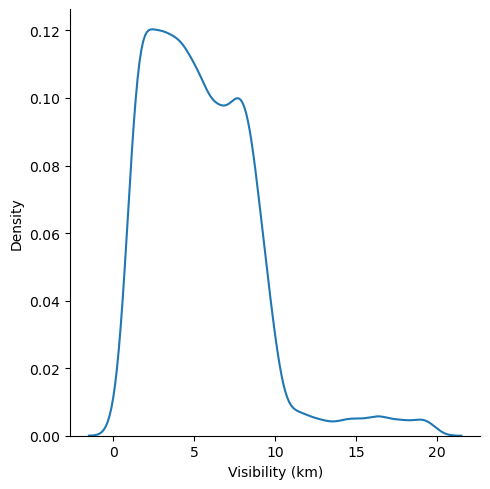

In [6]:
for col in num_cols :
    sns.displot(data = data, x = col, kind='kde')

In [7]:
# sns.pairplot(data,hue='Weather Type')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Temperature'),
  Text(1, 0, 'Humidity'),
  Text(2, 0, 'Wind Speed'),
  Text(3, 0, 'Precipitation (%)'),
  Text(4, 0, 'Atmospheric Pressure'),
  Text(5, 0, 'UV Index'),
  Text(6, 0, 'Visibility (km)')])

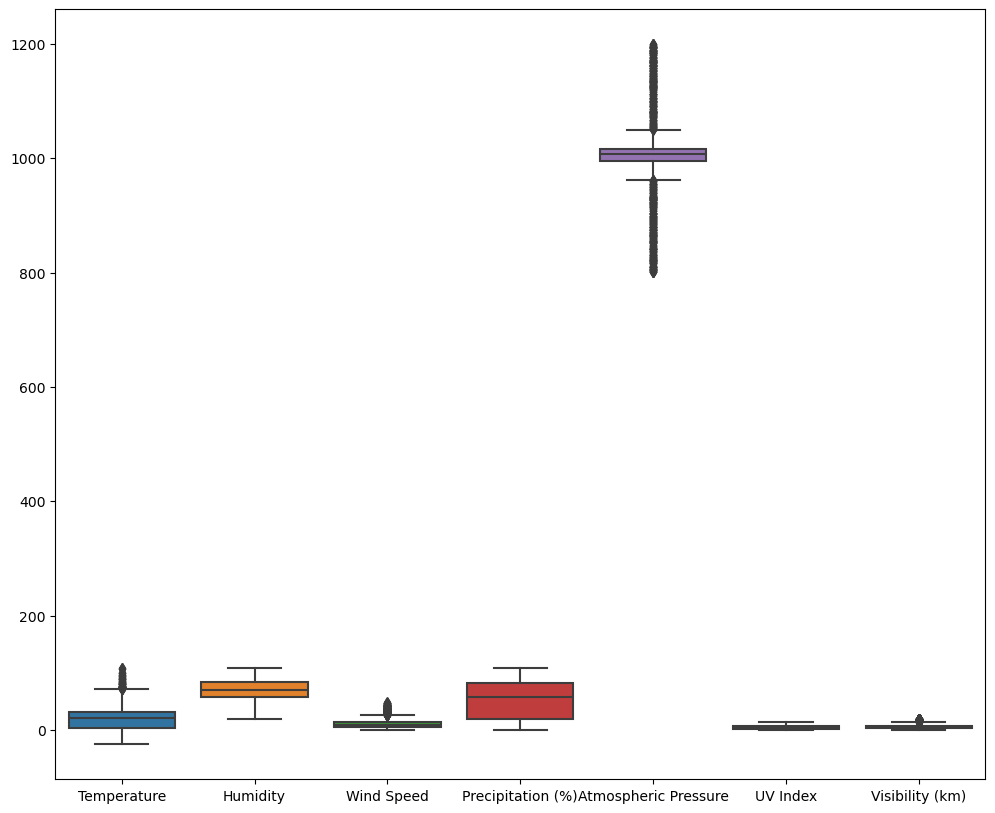

In [8]:
plt.figure(figsize=(12,10))
sns.boxplot(data)
plt.xticks()

In [9]:
num_cols

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

In [10]:
ds = data.copy()
ds['Weather Type'] = LabelEncoder().fit_transform(ds['Weather Type'])
ds['Weather Type'] = LabelEncoder().fit_transform(ds['Weather Type'])
ds.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,1
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,0
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,3
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,3
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,1


In [11]:

ds = ds.drop(['Cloud Cover', 'Season', 'Location'],axis=1)
correlation_matrix = ds.corr()

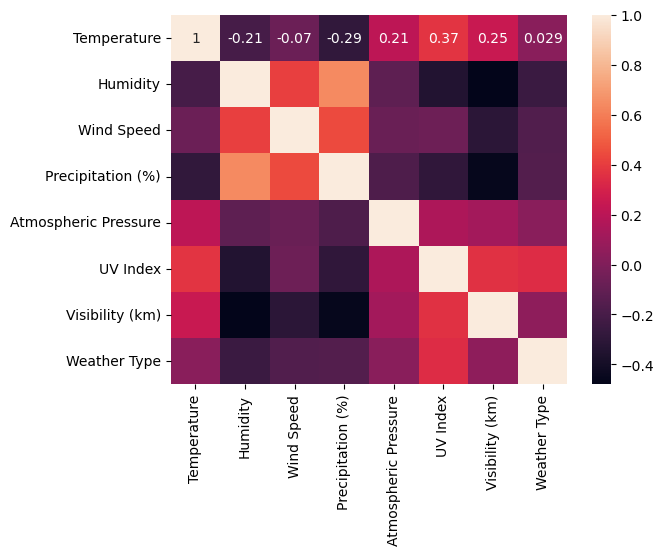

In [12]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# DATA PREPROCESSING AND MODELLING

In [13]:
df = data.copy()
ds = data.copy()
le = LabelEncoder()
ds['Weather Type'] = le.fit_transform(ds['Weather Type'])

X = df.drop('Weather Type',axis=1)
y = ds['Weather Type']

bagging = BaggingClassifier(random_state=42)
ridgeCV = RidgeClassifierCV()
ridge = RidgeClassifier()
lgbm = lgb.LGBMClassifier()
extraTree = ExtraTreesClassifier(random_state=42)

models = [bagging, ridgeCV, ridge, lgbm, extraTree]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OrdinalEncoder())


In [14]:
cat_cols = ['Cloud Cover', 'Season', 'Location']
num_cols

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

In [15]:
preprocessor = make_column_transformer(
    (num_pipeline, num_cols), (cat_pipeline,cat_cols)
    
)

In [16]:
model = make_pipeline(preprocessor,BaggingClassifier(random_state=42))
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9090909090909091
0.9090909090909091


In [17]:
for m in models:
    model = make_pipeline(preprocessor,m)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy',m.__class__.__name__,accuracy_score(y_test, y_pred),'\n')
    print(classification_report(y_test, y_pred),'\n')
    print(confusion_matrix(y_test, y_pred))

Accuracy BaggingClassifier 0.9090909090909091 

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       955
           1       0.88      0.90      0.89       982
           2       0.95      0.93      0.94      1033
           3       0.94      0.90      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960
 

[[861  54  20  20]
 [ 60 888  14  20]
 [ 24  27 963  19]
 [ 46  35  21 888]]
Accuracy RidgeClassifierCV 0.7919191919191919 

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       955
           1       0.80      0.76      0.78       982
           2       0.80      0.94      0.86      1033
           3       0.84      0.70      0.76       990

    accuracy                           0.79      3960
   macro avg       0.79      0.79      0.79      3960
weighted a

# Feature Selection

In [18]:
X.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location'],
      dtype='object')

In [19]:
scale = make_pipeline(preprocessor)
X = scale.fit_transform(X)

In [20]:
X.shape

(13200, 10)

In [21]:
selector = SelectKBest(f_classif, k=8)
selector.fit(X, y)
selector.scores_

array([4797.67350291, 1911.35137309,  877.14722198, 3776.77022084,
        330.39654159, 2326.57642138, 1927.72083983, 2513.04871348,
       1510.6929005 ,  321.99640393])

In [22]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [23]:
selector.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
       False])

In [24]:
col = ['Temperature', 'Humidity', 'Precipitation (%)', 'Atmospheric Pressure','UV Index','Visibility (km)','Cloud Cover', 'Season']

X = df[col]
y = ds['Weather Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:

ds = data.copy()
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OrdinalEncoder())

In [26]:
cat_cols = ['Cloud Cover', 'Season']
num_cols = ['Temperature', 'Humidity', 'Atmospheric Pressure','Precipitation (%)', 'UV Index','Visibility (km)']

In [27]:
preprocessor = make_column_transformer(
    (num_pipeline, num_cols),
    (cat_pipeline,cat_cols)
)

In [28]:
model = make_pipeline(preprocessor,BaggingClassifier(random_state=40))
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9063131313131313
0.9063131313131313


In [29]:
bagging = BaggingClassifier(random_state=40)
ridgeCV = RidgeClassifierCV()
ridge = RidgeClassifier()
lgbm = lgb.LGBMClassifier()
extraTree = ExtraTreesClassifier()

models = [bagging, ridgeCV, ridge, lgbm, extraTree]

for m in models:
    model = make_pipeline(preprocessor,m)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy',m.__class__.__name__,accuracy_score(y_test, y_pred),'\n')
    print(classification_report(y_test, y_pred),'\n')

Accuracy BaggingClassifier 0.9063131313131313 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       955
           1       0.90      0.90      0.90       982
           2       0.93      0.94      0.94      1033
           3       0.93      0.89      0.91       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960
 

Accuracy RidgeClassifierCV 0.7929292929292929 

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       955
           1       0.80      0.76      0.78       982
           2       0.80      0.94      0.86      1033
           3       0.85      0.69      0.76       990

    accuracy                           0.79      3960
   macro avg       0.80      0.79      0.79      3960
weighted avg       0.80      0.79      0.79      3960
 

Accuracy RidgeClassifier 0.792